In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from spg_overlay.utils.constants import DRONE_INITIAL_HEALTH
from collections import defaultdict


In [2]:
files = ["benchmarks/benchmark_1-1.json"] + [
    f"benchmarks/benchmark_{i}-0.json" for i in range(2, 6)
]

In [3]:
data = []
for file_name in files:
    with open(file_name, "r") as f:
        data.append(json.load(f))


In [4]:
score_names = ["score","percent_rescued","score_timestep","score_health_returned","score_exploration","percent_drones_destroyed", "mean_drones_health"]

list_scores = []
for i in range(len(data)):
    scores = {name:{} for name in score_names}
    for d in data[i]:
        for name in score_names:
            map_name = d["map_name"]+"\n"+d["zones"]
            if map_name not in scores[name]:
                scores[name][map_name] = []
            scores[name][map_name].append(d[name])
            
    for map_name in scores["mean_drones_health"]:
        scores["mean_drones_health"][map_name] = [100*x/DRONE_INITIAL_HEALTH for x in scores["mean_drones_health"][map_name]]
    list_scores.append(scores)

In [5]:
def plot_score_evolution(scores, title: str):
    means = np.array([np.mean(score) for score in scores])
    std_devs = np.array([np.std(score) for score in scores])
    
    plt.figure(figsize=(10, 5))
    plt.plot(means, label='Mean Score', marker='o', linestyle='-')
    plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Std Dev Zone')
    
    plt.xlabel('Version')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

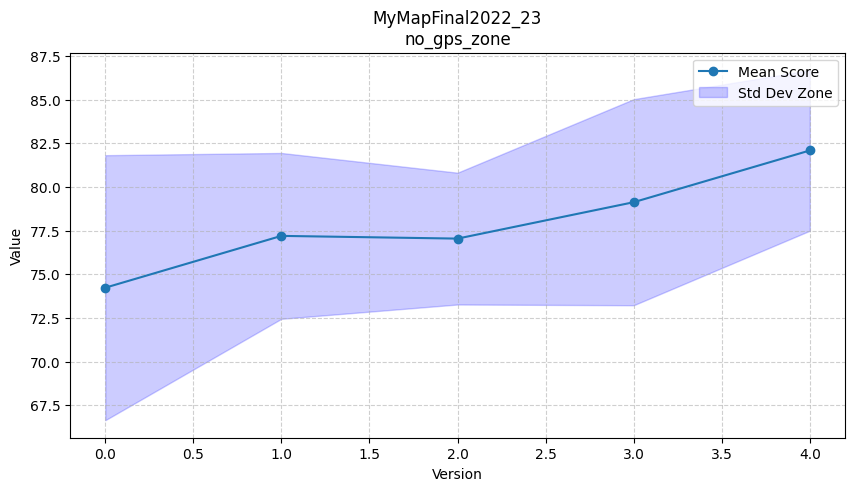

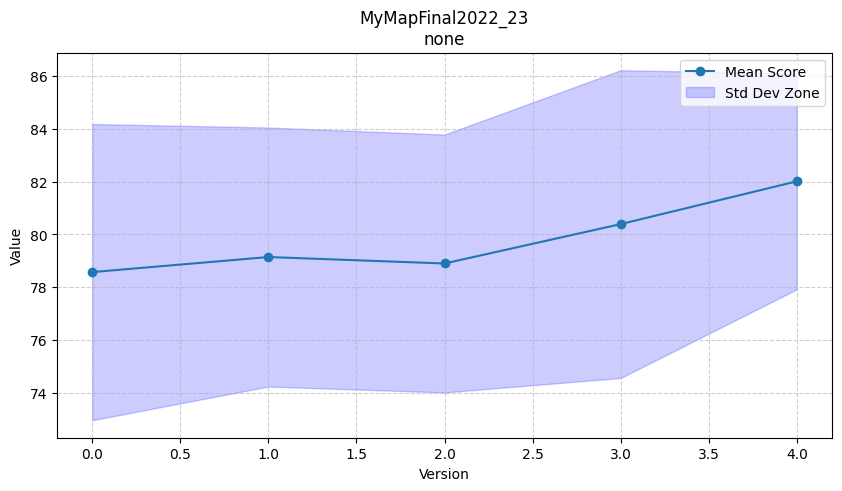

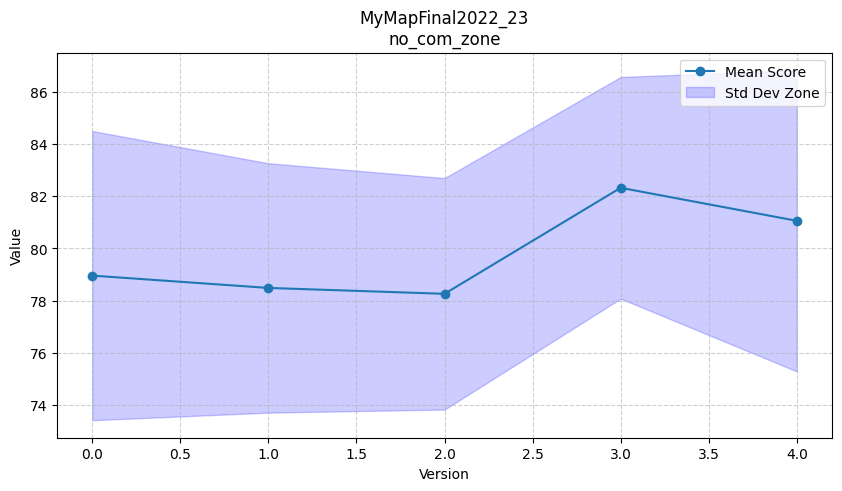

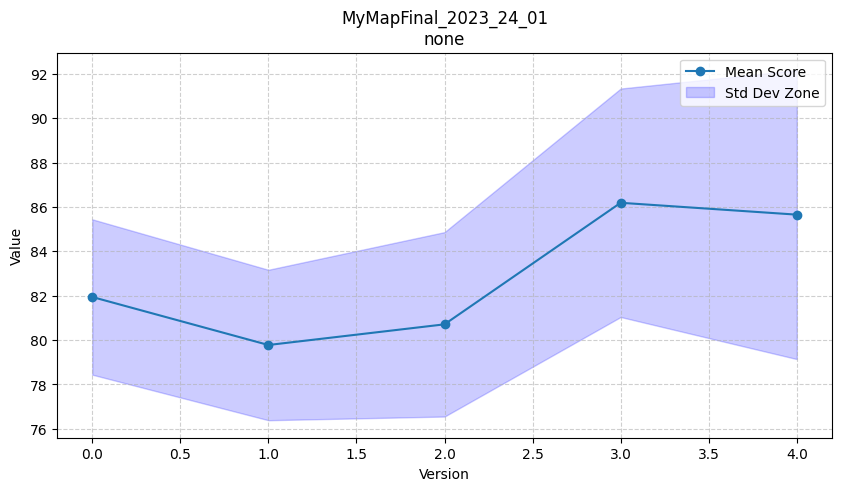

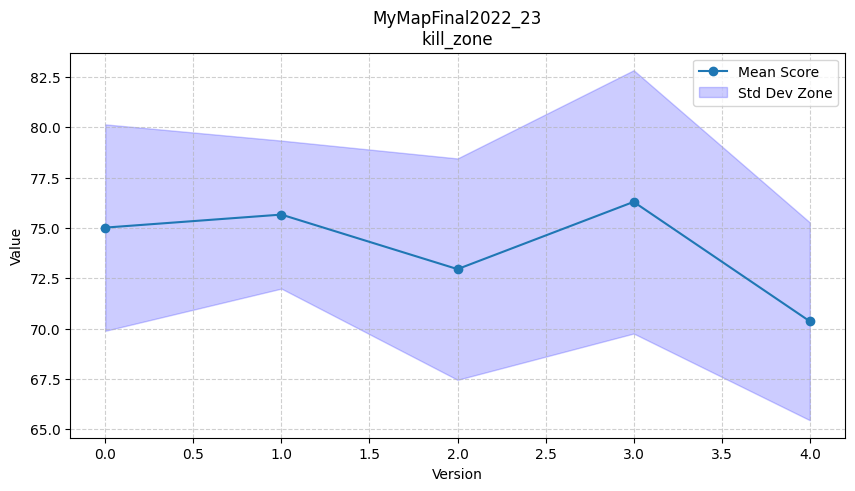

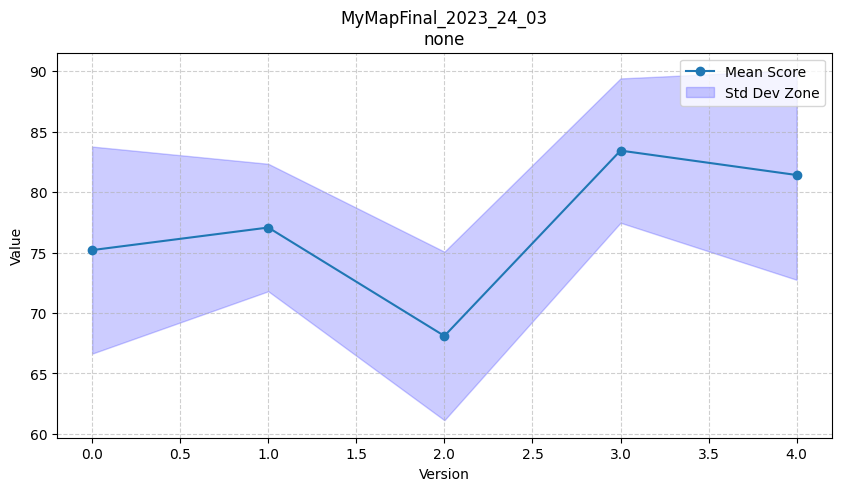

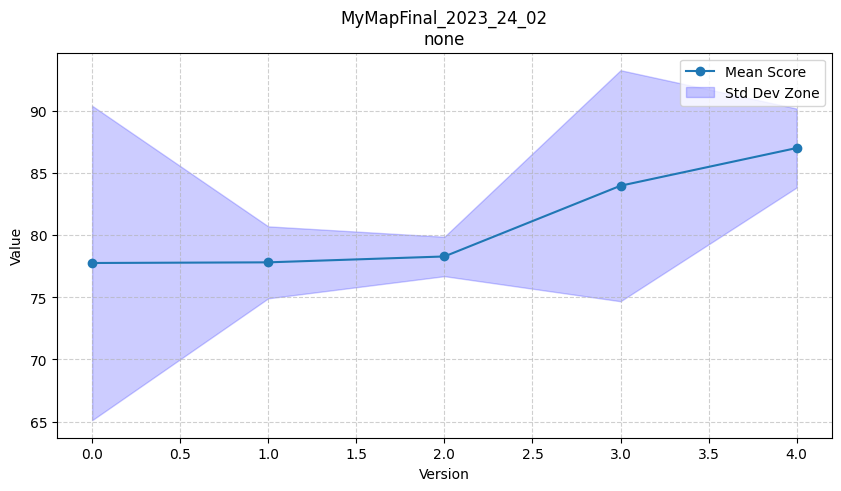

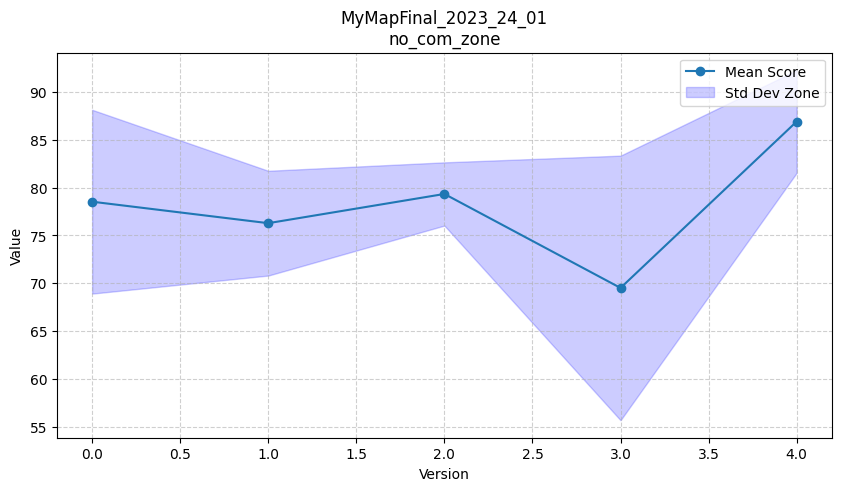

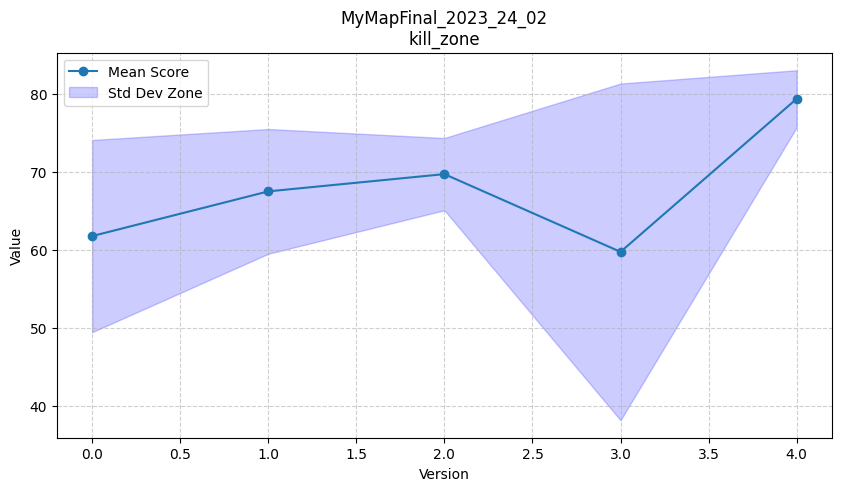

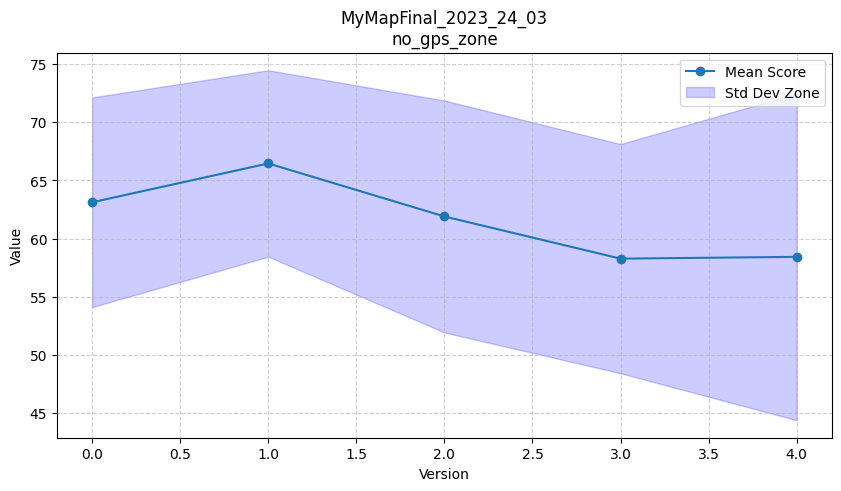

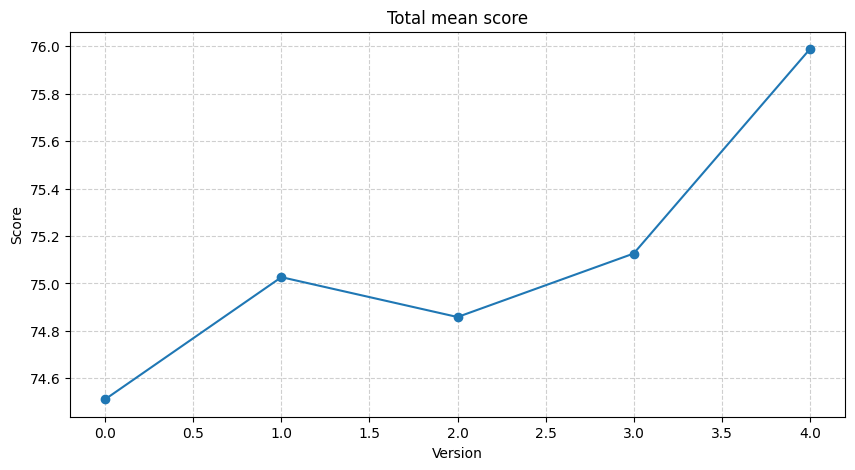

In [8]:
total_score = [[] for i in range(len(list_scores))]
for map_name in list_scores[0]["score"].keys():
    scores = []
    for k,d in enumerate(list_scores):
        scores.append(d["score"][map_name])
        total_score[k].append(np.mean(scores))
    plot_score_evolution(scores, map_name)
    
total_score = [np.mean(scores) for scores in total_score]
plt.figure(figsize=(10, 5))
plt.plot(total_score, marker='o', linestyle='-')

plt.xlabel('Version')
plt.ylabel('Score')
plt.title("Total mean score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()